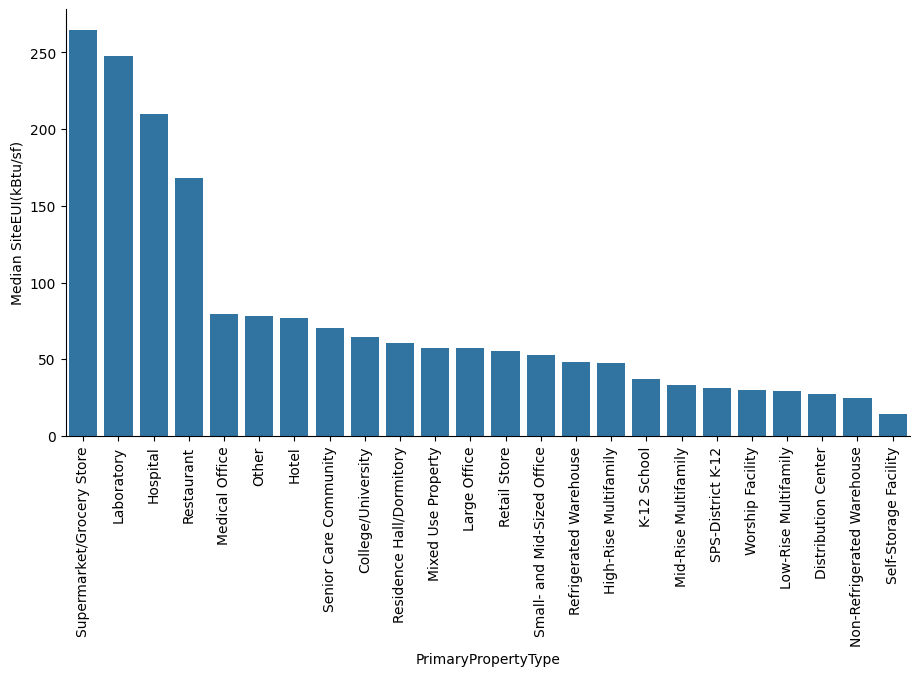

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline

df1= pd.read_csv('energy.csv')
# df1.head()
# df1.info()

import json
f = open('socrata.json')
data = json.load(f)
# data

## Drop Unnecessary Columns
df1=df1[['BuildingType', 'PrimaryPropertyType','Neighborhood', 'YearBuilt','NumberofFloors', 'SiteEUI(kBtu/sf)',
                    'GHGEmissionsIntensity(kgCO2e/ft2)']]
# df1.head()
#df1.info()

## Drop row with missing value
df1=df1.dropna()
#df1.info()

## Some PrimaryPropertyType has "/n" clean them 
df1['PrimaryPropertyType']=df1['PrimaryPropertyType'].apply(lambda x:x.replace('\n',"" ))
# df1.info()

#Find Median of EUI for different "PrimaryPropertyType"
Site_EUI=df1.groupby(['PrimaryPropertyType'])['SiteEUI(kBtu/sf)'].median().to_frame(name = 'Median SiteEUI(kBtu/sf)').reset_index()
Site_EUI.sort_values(by=['Median SiteEUI(kBtu/sf)'], inplace=True,ascending=False)
#Site_EUI

#Find Median of GHG Emissions Intensity for different "PrimaryPropertyType"
GHG_Emission=df1.groupby(['PrimaryPropertyType'])['GHGEmissionsIntensity(kgCO2e/ft2)'].median().to_frame(name = 'Median GHGEmissionsIntensity(kgCO2e/sf)').reset_index()
GHG_Emission.sort_values(by=['Median GHGEmissionsIntensity(kgCO2e/sf)'], inplace=True,ascending=False)
# GHG_Emission

#Print Median EUI bar plot for building Primary Property Type

sns.catplot(x='PrimaryPropertyType', y='Median SiteEUI(kBtu/sf)', data=Site_EUI,height=5,aspect=2,kind='bar')
plt.xticks(rotation=90);



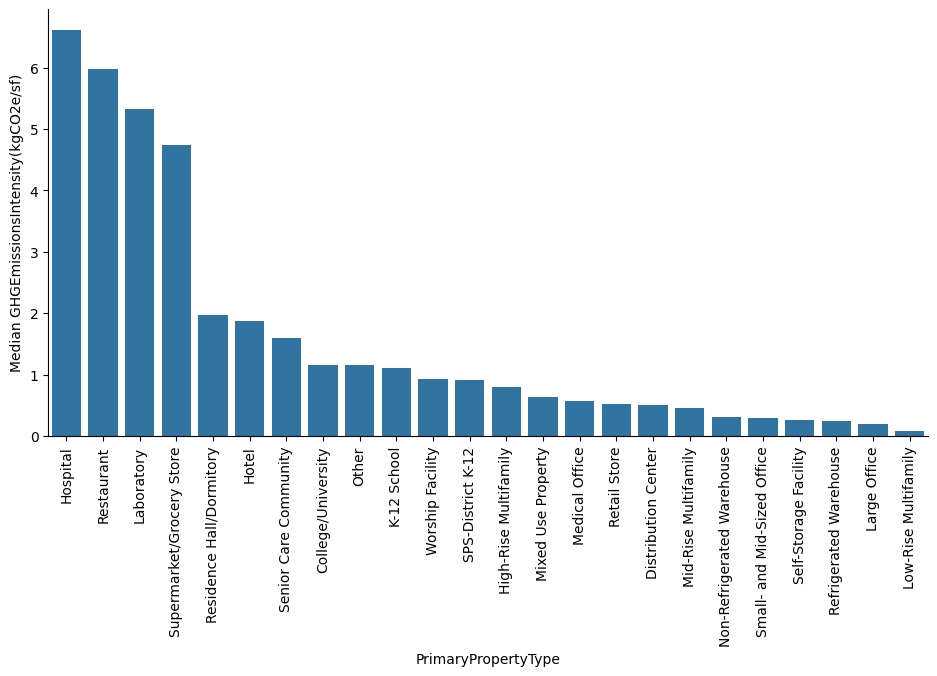

In [3]:
#Print Median GHG Emissions Intensity bar plot for building Primary Property Type
sns.catplot(x='PrimaryPropertyType', y='Median GHGEmissionsIntensity(kgCO2e/sf)', data=GHG_Emission ,height=5,aspect=2,kind='bar')
plt.xticks(rotation=90);

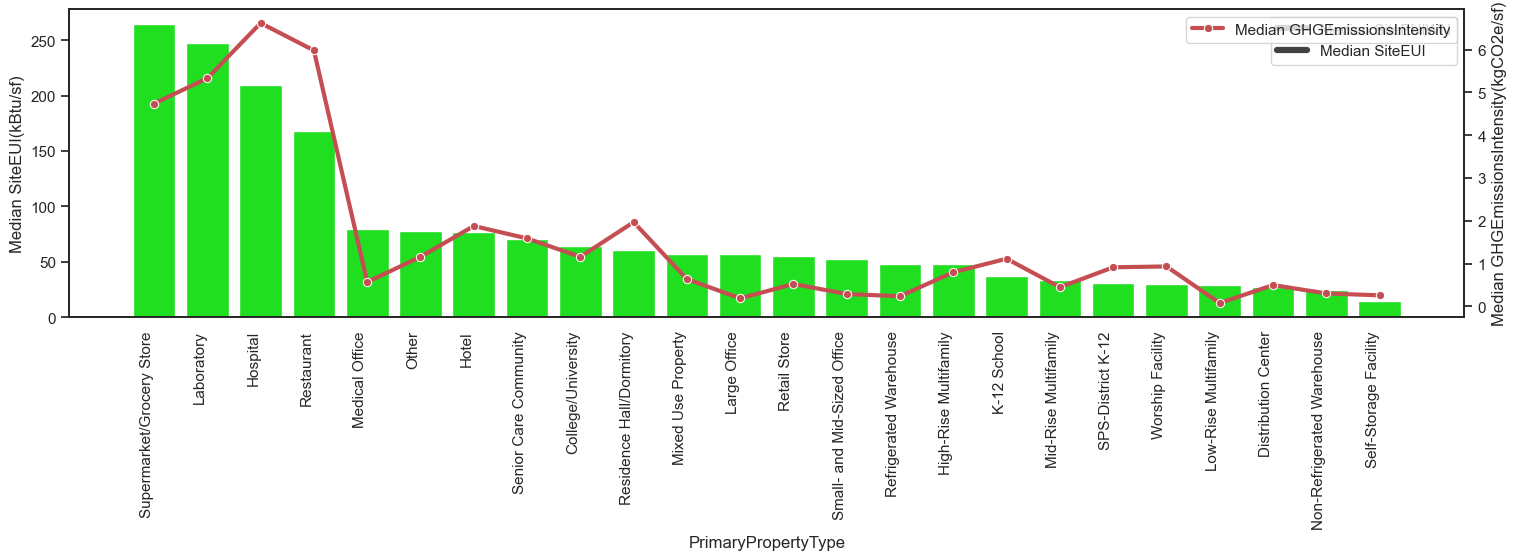

In [7]:
#Print Median EUI bar plot and Median GHG Emissions Intensity line plot for building Primary Property Type
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(18,4))
plt.xticks(rotation=90, ha='right')
ax2 = ax1.twinx()
sns.barplot(x=Site_EUI['PrimaryPropertyType'], 
             y=Site_EUI['Median SiteEUI(kBtu/sf)'], 
            color='#00FF00',ax=ax1
           )
plt.xticks(rotation=90)
sns.lineplot(x=GHG_Emission['PrimaryPropertyType'], 
             y=GHG_Emission['Median GHGEmissionsIntensity(kgCO2e/sf)'],
             color='r',
             marker="o",ax=ax2
            )

categorical_1=['Median SiteEUIWN','Median SiteEUI']
ax1.legend(categorical_1, facecolor='w')
categorical_2=['Median GHGEmissionsIntensity']
ax2.legend(categorical_2, facecolor='w')

plt.show()
sns.set()